<a href="https://colab.research.google.com/github/gaubeur/datascience/blob/master/trabalho_pratico_modulo_1_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

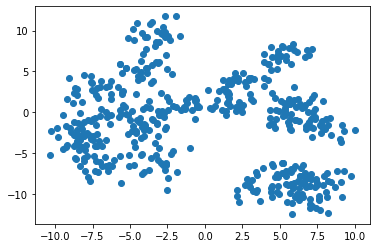

In [2]:
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

In [3]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = 19, wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 1

In [4]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
n = optimal_number_of_clusters(wcss)
print(n)

4


In [5]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

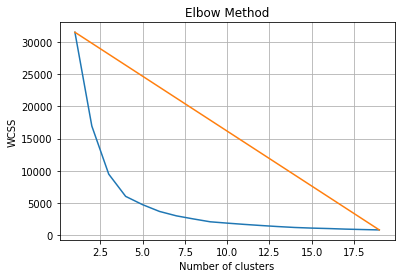

In [6]:
plt.plot(range(1, 20), wcss)
plt.plot([1, 19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

** EXECUÇÃO DO ALGORITMO K-MEANS PARA APENAS 1 CLUSTER **

In [7]:
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)

In [9]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# coordenada do centroide
kmeans.cluster_centers_

array([[ 0.02618523, -1.30384304]])

In [12]:
#soma dos quadrados intra-clusters (wcss) 
#within-clusters sum-of-squares
kmeans.inertia_

31547.372471390485

In [ ]:
** EXECUÇÃO DO ALGORITMO K-MEANS PARA APENAS 5 CLUSTER **

In [13]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)

In [14]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
# coordenada do centroide
kmeans.cluster_centers_

array([[ 2.37055809,  3.33784875],
       [ 6.01305095, -8.90895584],
       [-6.00093158, -3.22985389],
       [-4.77234911,  5.66811008],
       [ 6.54167452, -0.57833569]])

In [16]:
#soma dos quadrados intra-clusters (wcss) 
#within-clusters sum-of-squares
kmeans.inertia_

4717.404091931214